# 📄 **Resume2Role: Intelligent Resume Classification for Recruitment Platforms**


## **1. Introduction:**

The project focuses on classifying resumes into different job categories using deep learning. It uses a Bi-directional LSTM model for improved context understanding in text classification.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flowdiagram/flowchart.jpg
/kaggle/input/projectai/Resume.csv


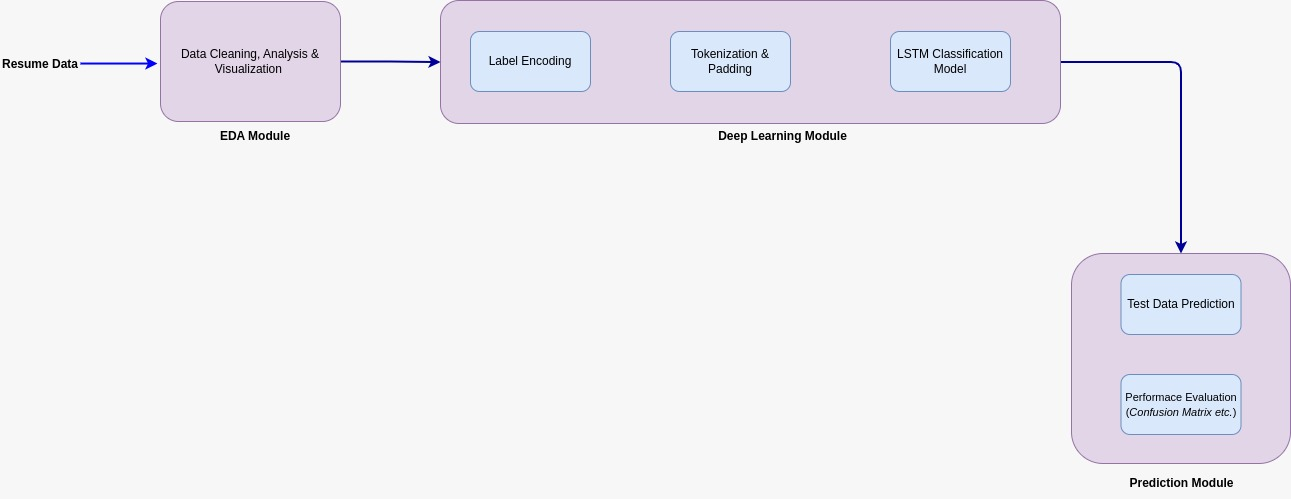

In [4]:
from IPython.display import Image
Image(filename='/kaggle/input/flowdiagram/flowchart.jpg')

Fig 1: Flow diagram of the overall proposed solution 

## **2. Loading libraries and dataset**

Essential Python libraries such as NumPy, pandas, TensorFlow, and NLTK are imported. These provide support for data processing, model development, and evaluation.


In [5]:
!pip install nltk
!pip install gensim
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 47.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is inc

In [6]:
import pandas as pd
import nltk
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
import re
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

2025-05-03 10:21:12.099881: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746267672.312569      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746267672.375983      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### **2.1 Dataset Description:**

#### 🗂️ Context
A dataset of resume examples sourced from livecareer.com, intended for classifying resumes into predefined job categories.

---

#### 📦 Content
Includes over 2400 resumes in both string and PDF formats.  
PDFs are stored in the `data` folder, organized into category-based subfolders. Each resume is saved as a PDF file named after its corresponding ID in the CSV file.

---

#### 📑 CSV File Contains:

- **ID**: Unique identifier and filename for the corresponding PDF.  
- **Resume_str**: Resume content in plain text format.  
- **Resume_html**: Resume data in HTML format as captured during web scraping.  
- **Category**: Job role category the resume corresponds to.

---

#### 🏷️ Available Categories:

HR, Designer, Information-Technology, Teacher, Advocate, Business-Development, Healthcare, Fitness, Agriculture, BPO, Sales, Consultant, Digital-Media, Automobile, Chef, Finance, Apparel, Engineering, Accountant, Construction, Public-Relations, Banking, Arts, Aviation

In [7]:
#Load the Dataset
df = pd.read_csv('/kaggle/input/projectai/Resume.csv')  # Replace with your dataset path

In [8]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [9]:
df.shape

(2484, 4)

In [10]:
df.info

<bound method DataFrame.info of             ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2     33176873           HR DIRECTOR       Summary      Over 2...   
3     27018550           HR SPECIALIST       Summary    Dedica...   
4     17812897           HR MANAGER         Skill Highlights  ...   
...        ...                                                ...   
2479  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
2480  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
2481  31605080           GEEK SQUAD AGENT         Professional...   
2482  21190805           PROGRAM DIRECTOR / OFFICE MANAGER    ...   
2483  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  
0     <div class="fontsize fontface vmargins hmargin...        HR  
1  

In [11]:
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [12]:
df.Category.value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [13]:
len(df['Category'].value_counts())

24

## **3. Exploratory Data Analysis:**

Basic analysis such as category distribution and sample data visualization is performed. This helps in understanding the data composition and identifying any imbalance.


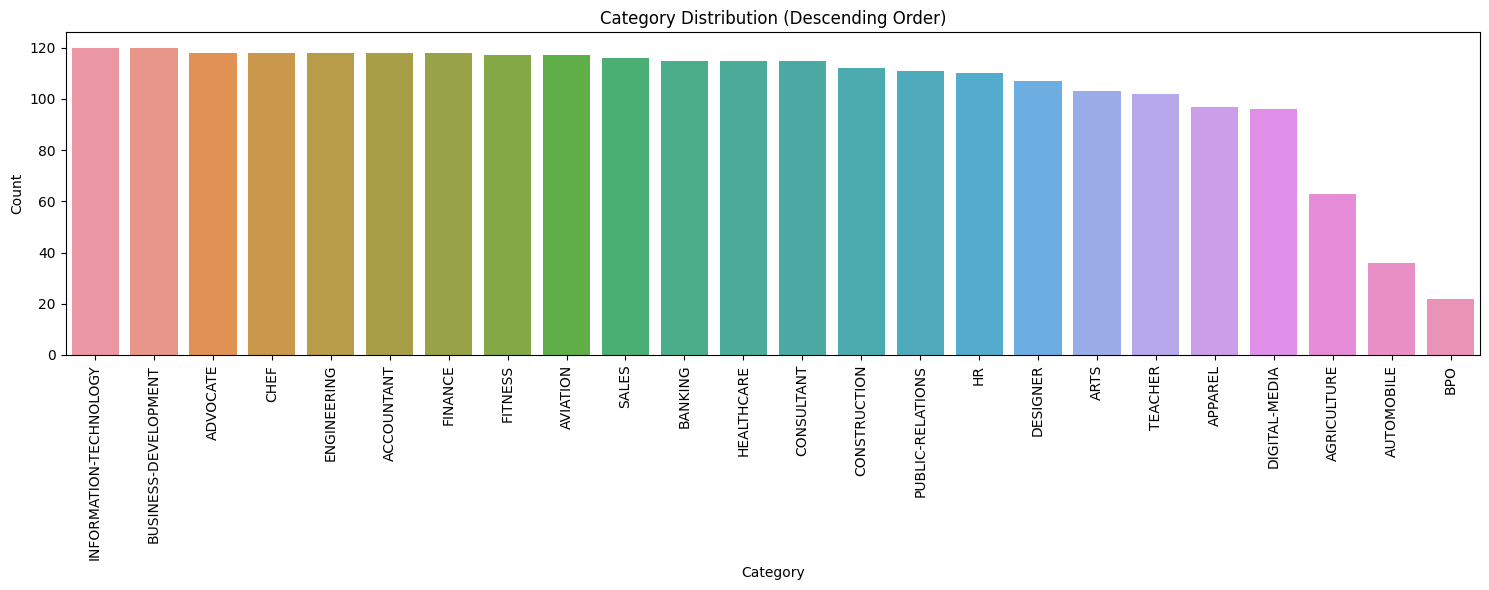

In [14]:
# Calculate the order of categories based on their counts in descending order
category_order = df['Category'].value_counts().index

# Visualize the distribution of categories
plt.figure(figsize=(15, 6))
sns.countplot(x='Category', data=df, order=category_order) # Added order parameter
plt.xticks(rotation=90)
plt.title('Category Distribution (Descending Order)') # Updated title for clarity
plt.ylabel('Count') # Add a label for the y-axis
plt.xlabel('Category') # Add a label for the x-axis
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

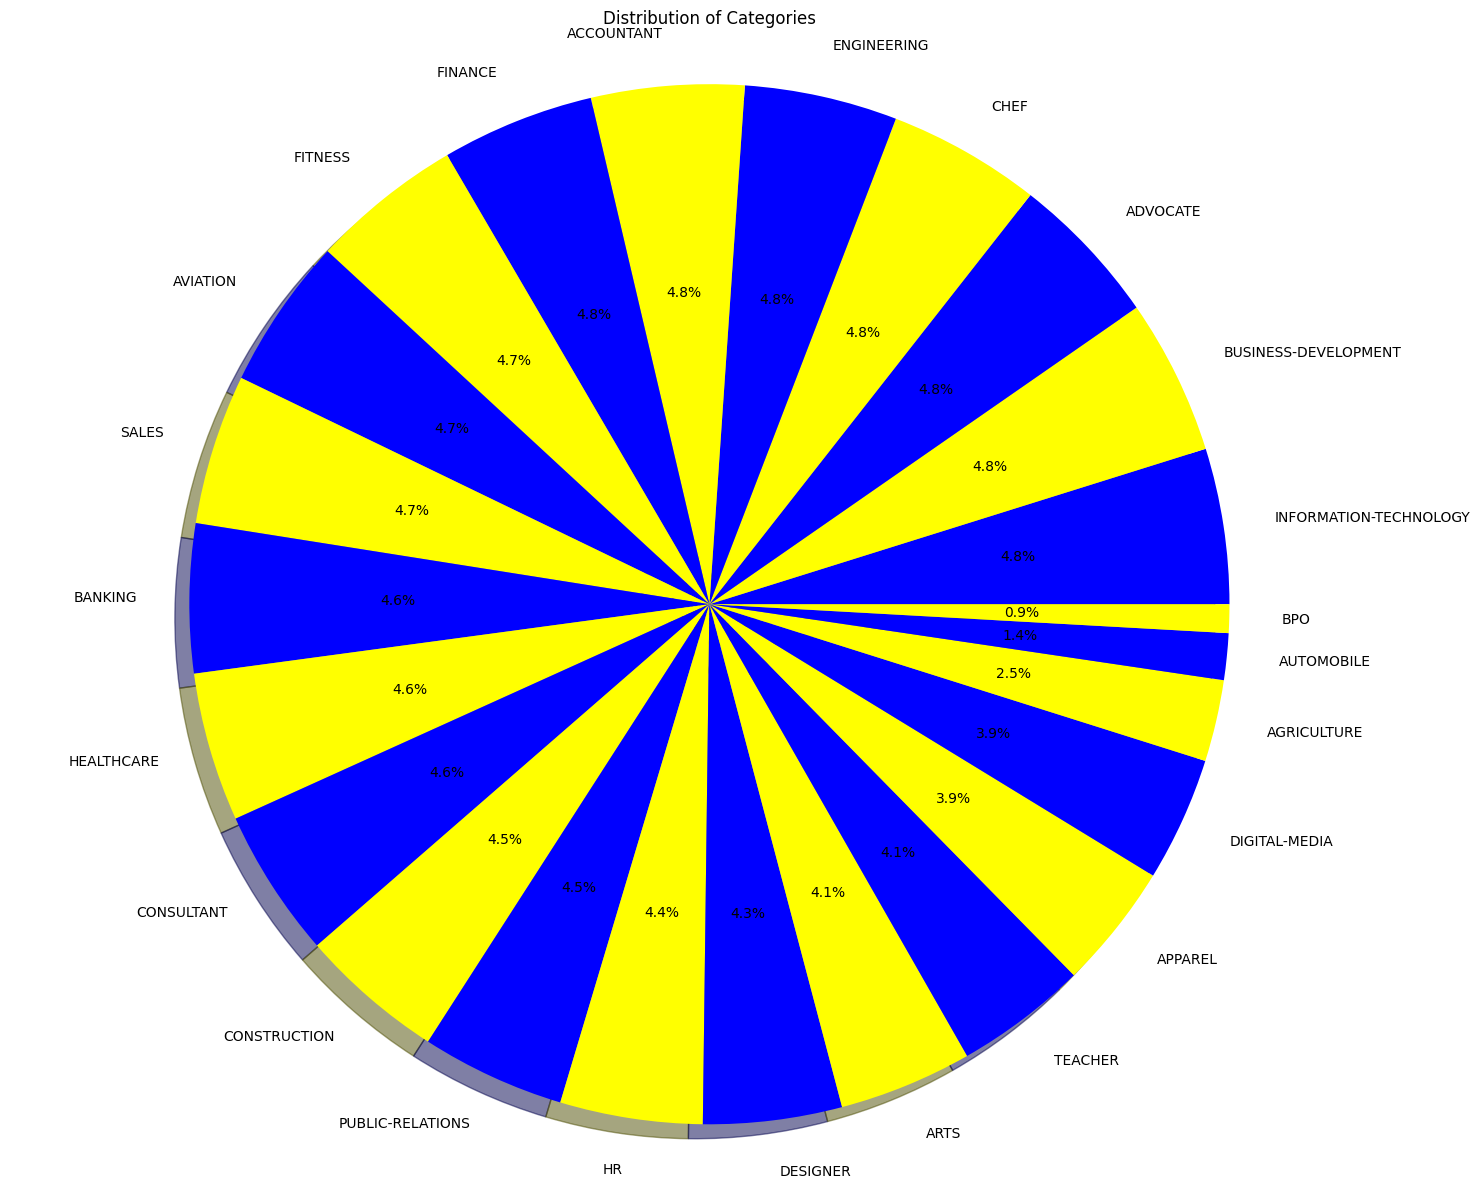

In [15]:
# create pie plot
counts = df['Category'].value_counts()
labels = counts.index # Use the index from value_counts for labels

plt.figure(figsize=(15,12))

# Define the desired custom colors
# NOTE: If you have more than 2 unique categories, these two colors will cycle.
# If you need a specific color for each category, you'll need a list of colors
# with the same length as the number of unique categories.
custom_colors = ['blue', 'yellow']

plt.pie(counts,
        labels=labels,
        autopct='%1.1f%%',
        shadow=True,
        colors=custom_colors) # Use the custom colors list here

plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

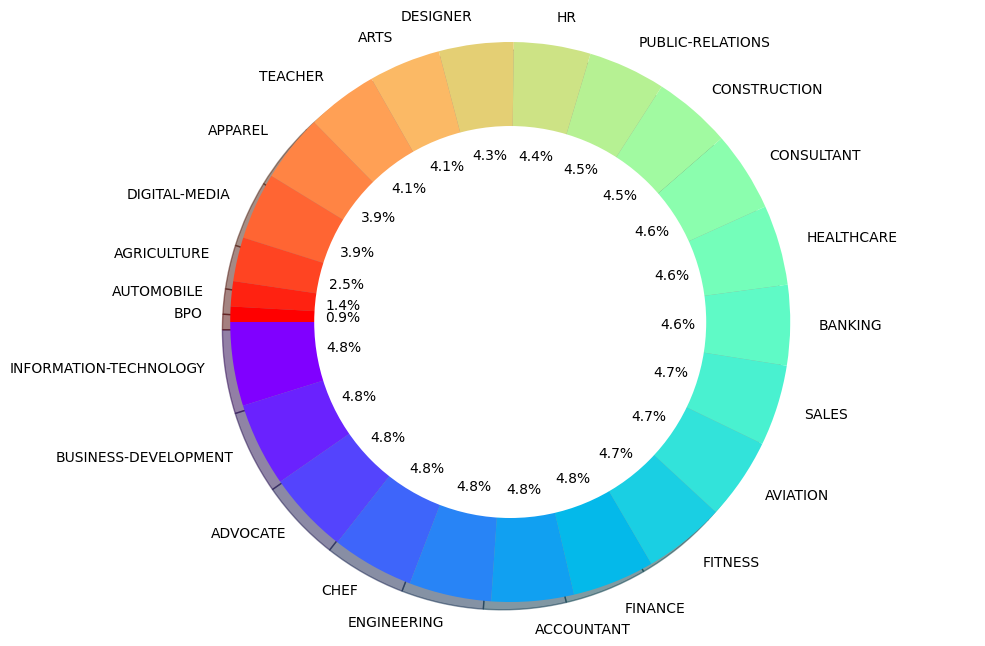

In [16]:
# Create a color palette
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

# Create pie plot
plt.figure(figsize=(12, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors, startangle=180)

# Add a circle at the center to simulate depth perception
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.show()

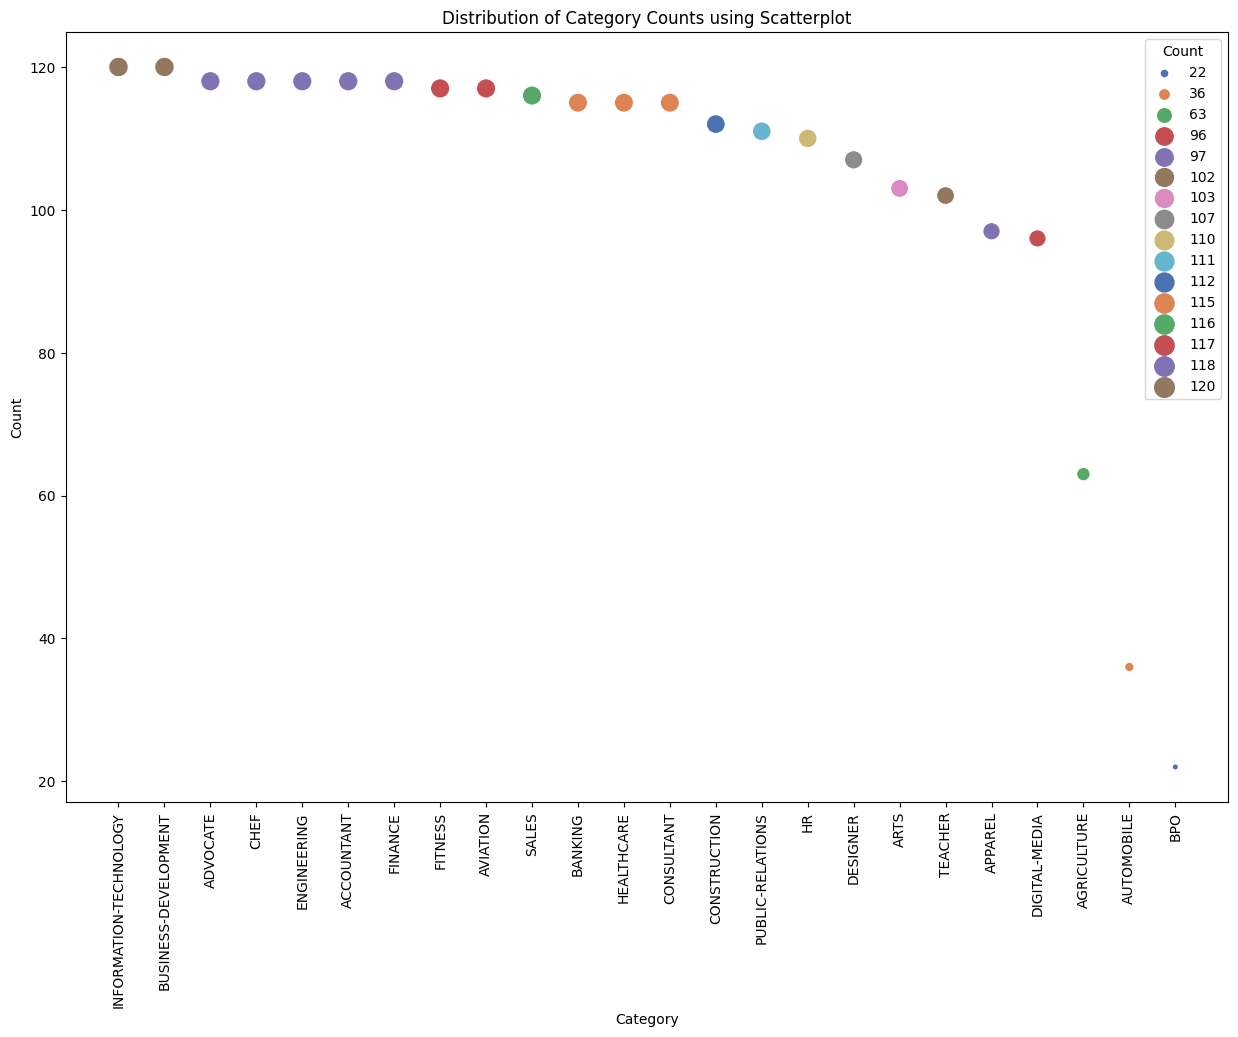

In [17]:
# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Create a DataFrame with unique category names and their counts
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Count']

# Create a violin plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=category_counts_df, x="Category", y="Count" ,size="Count",hue="Count", sizes=(20, 200), hue_norm=(0, 7), palette="deep",legend="full")
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Category Counts using Scatterplot')
plt.xticks(rotation=90)
plt.show()

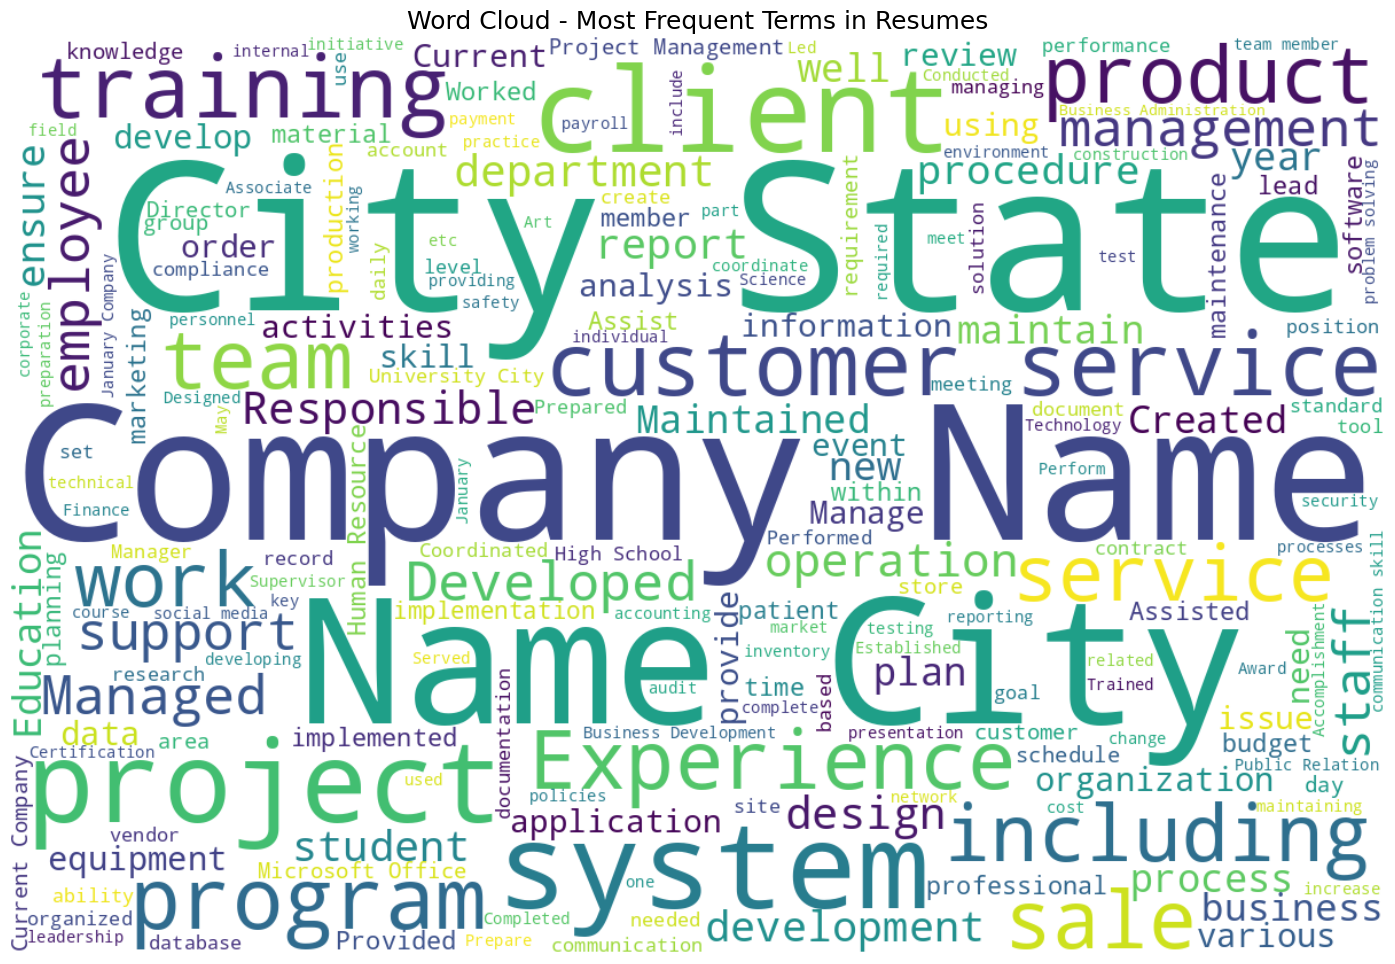

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS # Import STOPWORDS
import numpy as np # Needed if using a mask image
from PIL import Image # Needed if using a mask image
import collections # Not strictly needed if using generate(), but good practice if doing manual counts

# Assuming resume_data is your DataFrame containing the 'Category' and 'resume' columns
# Make sure you have a column with the actual text content, let's assume it's named 'resume'.

# --- Check if 'resume' column exists and handle potential missing values ---
if 'Resume_str' not in df.columns:
    print("Error: 'resume' column not found in DataFrame. Please check your column names.")
    # You might want to exit or handle this case appropriately
else:
    # Combine text from the 'resume' column
    # Convert any potential NaN values to strings before joining
    combined_text = ' '.join(df['Resume_str'].fillna('').astype(str))

    # --- Customize Word Cloud Options ---

    # 1. Define Stopwords: Remove common words that don't add meaning
    # WordCloud has default English stopwords, but you can add more.
    stopwords = set(STOPWORDS)
    # Example: Add category names to stopwords if they frequently appear in the text but aren't informative
    # stopwords.update(['IT', 'HR', 'Finance', 'Marketing', 'Engineer', 'Developer']) # Add your specific category names

    # 2. Choose a Background Color
    background_color = 'white' # Options: 'white', 'black', 'lightblue', etc.

    # 3. Choose a Color Map: Defines the colors for the words
    # See options here: https://matplotlib.org/stable/users/explain/colors/colormaps.html
    # 'viridis', 'plasma', 'inferno', 'cividis', 'magma' are perceptually uniform
    # 'tab10', 'tab20' provide distinct colors
    # 'Blues', 'Greens', 'Reds' provide sequential colors
    colormap = 'viridis' # Change this to experiment with different color schemes

    # 4. Set Maximum Words to display
    max_words = 200 # Limits the total number of words shown. Adjust as needed.

    # 5. Optional: Use a Mask Image for shape
    # To use a mask, you need a PNG image with a transparent background.
    # Make sure you have the Pillow library installed (`pip install Pillow`).
    # Uncomment the following lines and replace "path/to/your/mask.png" with your image file path.
    # try:
    #     mask_image_path = "path/to/your/mask.png" # <--- IMPORTANT: Replace with your image path
    #     mask_image = np.array(Image.open(mask_image_path))
    #     # Use the mask in the WordCloud constructor
    #     wc_mask = mask_image
    #     # If using a mask, background_color might need adjustment or the image should handle it
    #     # colormap is often good with masks
    # except FileNotFoundError:
    #     print(f"Warning: Mask image not found at {mask_image_path}. Generating without mask.")
    #     wc_mask = None # Set mask to None if image is not found
    # except Exception as e:
    #      print(f"Warning: Could not load mask image: {e}. Generating without mask.")
    #      wc_mask = None # Set mask to None if error occurs
    wc_mask = None # Default: No mask

    # Create the WordCloud object with enhanced parameters
    wordcloud = WordCloud(
        width=1200 if wc_mask is None else None, # Auto-size if mask is used
        height=800 if wc_mask is None else None, # Auto-size if mask is used
        background_color=background_color,
        stopwords=stopwords,
        max_words=max_words,
        colormap=colormap,
        mask=wc_mask, # Apply the mask if loaded
        random_state=42, # Add random state for reproducibility
        contour_width=3, # Add contour if using a mask (optional)
        contour_color='steelblue' # Add contour color if using a mask (optional)
    ).generate(combined_text) # Use .generate() with the combined raw text

    # Display the word cloud
    plt.figure(figsize=(15, 10)) # Adjust figure size
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # Hide axes
    plt.title('Word Cloud - Most Frequent Terms in Resumes', fontsize=18) # More descriptive title
    plt.tight_layout(pad=2) # Adjust layout to prevent elements from overlapping
    plt.show()

### **3.1 Data Cleaning:**

Text data is cleaned by removing URLs, punctuation, numbers, and stopwords. This standardizes inputs and improves model performance by focusing on relevant text.

In [48]:
#balancing the dataset using oversampling method
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Load your dataset
df = pd.read_csv("/kaggle/input/projectai/Resume.csv")

# Print columns to confirm names
print("Available columns:", df.columns)

# Replace these with actual column names in your CSV
text_col = 'Resume_str'         # change to your actual text column
label_col = 'Category'      # change to your actual target label

# Find the majority class count
max_count = df[label_col].value_counts().max()

balanced_dfs = []

# Balance each class
for label in df[label_col].unique():
    df_class = df[df[label_col] == label]
    if len(df_class) == max_count:
        balanced_dfs.append(df_class)
    else:
        df_upsampled = resample(df_class, replace=True, n_samples=max_count, random_state=42)
        # Add light noise to prevent overfitting (if needed)
        df_upsampled[text_col] = df_upsampled[text_col].apply(lambda x: str(x) + " ")
        balanced_dfs.append(df_upsampled)

# Combine and shuffle
df_balanced = pd.concat(balanced_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# Save the result
df_balanced.to_csv("balanced_dataset.csv", index=False)
print("✅ Balanced dataset saved. Shape:", df_balanced.shape)


Available columns: Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')
✅ Balanced dataset saved. Shape: (2880, 4)


In [49]:
# Load the balanced dataset
df_balanced = pd.read_csv("balanced_dataset.csv")

# Show the count of each category
category_counts = df_balanced['Category'].value_counts()
print(category_counts)


Category
TEACHER                   120
DIGITAL-MEDIA             120
CONSTRUCTION              120
AUTOMOBILE                120
BPO                       120
SALES                     120
ACCOUNTANT                120
FITNESS                   120
FINANCE                   120
AVIATION                  120
ARTS                      120
CHEF                      120
HEALTHCARE                120
ADVOCATE                  120
DESIGNER                  120
INFORMATION-TECHNOLOGY    120
APPAREL                   120
AGRICULTURE               120
CONSULTANT                120
BANKING                   120
PUBLIC-RELATIONS          120
ENGINEERING               120
BUSINESS-DEVELOPMENT      120
HR                        120
Name: count, dtype: int64


In [50]:
df_balanced.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [51]:
df_balanced


,ID,Resume_str,Resume_html,Category
0,28772892,TEACHER Professional Summary ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER
1,13343786,SR. LEAVE OF ADMINISTRATIVE SPECIALIS...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA
2,25098739,CONSTRUCTION WORKER Summary...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION
3,24592627,SENIOR SPECIAL INVESTIGATOR ...,"<div class=""fontsize fontface vmargins hmargin...",AUTOMOBILE
4,45077654,CLAIMS SUBJECT MATTER EXPERT ...,"<div class=""fontsize fontface vmargins hmargin...",BPO
...,...,...,...,...
2875,23009962,ORGANIZATION DEVELOPMENT CONSULTANT ...,"<div class=""fontsize fontface vmargins hmargin...",AUTOMOBILE
2876,19362586,RISK SPECIALIST Professional Su...,"<div class=""fontsize fontface vmargins hmargin...",BPO
2877,69097572,TRANSACTION PROCESSING ANALYST ...,"<div class=""fontsize fontface vmargins hmargin...",BPO
2878,15581242,SALES SPECIALIST Objective ...,"<div class=""fontsize fontface vmargins hmargin...",SALES


In [52]:
# 1. Remove the specified columns ('ID' and 'Resume_html')
columns_to_drop = ['ID', 'Resume_html']
df_balanced.drop(columns=columns_to_drop, inplace=True)
print("Removed 'ID' and 'Resume_html' columns.")


# 2. Rename the 'Resume_str' column to 'resume_txt'
rename_mapping = {'Resume_str': 'resume_txt'}
df_balanced.rename(columns=rename_mapping, inplace=True)
print("Renamed 'Resume_str' to 'resume_txt'.")

# Verify the changes
print("\nDataFrame after operations:")
print(df_balanced.head())
print("\nRemaining columns:")
print(df_balanced.columns)

Removed 'ID' and 'Resume_html' columns.
Renamed 'Resume_str' to 'resume_txt'.

DataFrame after operations:
                                          resume_txt       Category
0           TEACHER       Professional Summary   ...        TEACHER
1           SR. LEAVE OF ADMINISTRATIVE SPECIALIS...  DIGITAL-MEDIA
2           CONSTRUCTION WORKER           Summary...   CONSTRUCTION
3           SENIOR SPECIAL INVESTIGATOR          ...     AUTOMOBILE
4           CLAIMS SUBJECT MATTER EXPERT         ...            BPO

Remaining columns:
Index(['resume_txt', 'Category'], dtype='object')


In [53]:
df_balanced["resume_txt"][0]

'         TEACHER       Professional Summary    EXCEPTIONAL SPECIAL EDUCATION PROFESSIONAL SEEKING DIRECTOR POSITION Passionate educator who strongly believes that all students can achieve excellence. Goal oriented scholar with excellent communication skills and proven ability in making connections and building rapport with school personnel, students, parents, interagency teams, and community organizations. Strive to support and enhance the lives of the visually impaired community who is currently underserved.  Areas of Excellence: business/human resource management       * special education laws        * data analysis interviewing & staffing          * RTI/MSDI          * school-wide PBS instruction & planning          * employee development    * IDEA compliance budgeting          * instructional coaching        * progress monitoring scheduling          * PD Facilitator          * documentation       Skills                    Work History      Teacher     08/2017  \n                  

## **4. Deep Learning Classification Model**

 ### **4.1 Text Preprocessing:**

Tokenization and padding are applied to prepare resume text for input into the neural network. The Tokenizer from Keras is used along with padding sequences to ensure uniform input length.

In [54]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean resume text
def clean_resume(text):
    if pd.isnull(text):
        return ''
    
    # Lowercase
    text = text.lower()
    
    # Remove numbers and special characters (keep only letters and spaces)
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join and remove extra spaces
    cleaned_text = ' '.join(filtered_tokens)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

# Apply cleaning to the 'resume_txt' column
df_balanced['Cleaned Resume'] = df_balanced['resume_txt'].apply(clean_resume)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
df_balanced.head()

,resume_txt,Category,Cleaned Resume
0,TEACHER Professional Summary ...,TEACHER,teacher professional summary exceptional speci...
1,SR. LEAVE OF ADMINISTRATIVE SPECIALIS...,DIGITAL-MEDIA,sr leave administrative specialist professiona...
2,CONSTRUCTION WORKER Summary...,CONSTRUCTION,construction worker summary motivated hard wor...
3,SENIOR SPECIAL INVESTIGATOR ...,AUTOMOBILE,senior special investigator summary work withi...
4,CLAIMS SUBJECT MATTER EXPERT ...,BPO,claims subject matter expert professional summ...


In [56]:
df_balanced['Cleaned Resume'][0]

'teacher professional summary exceptional special education professional seeking director position passionate educator strongly believes students achieve excellence goal oriented scholar excellent communication skills proven ability making connections building rapport school personnel students parents interagency teams community organizations strive support enhance lives visually impaired community currently underserved areas excellence business human resource management special education laws data analysis interviewing staffing rti msdi school wide pbs instruction planning employee development idea compliance budgeting instructional coaching progress monitoring scheduling pd facilitator documentation skills work history teacher current company name city state collaborate professional staff create comprehensive youth team goals advocate needs students visual impairments work team low vision specialists organizing extracurricular youth activities providing vision rehabilitation services

In [57]:
# Convert column names to lowercase
df_balanced.columns = df_balanced.columns.str.lower()

# Drop 'id' and 'resume_html' columns if they exist
df_balanced = df_balanced.drop(columns=['id', 'resume_html','resume_txt'], errors='ignore')


In [58]:
df_balanced.head()

,category,cleaned resume
0,TEACHER,teacher professional summary exceptional speci...
1,DIGITAL-MEDIA,sr leave administrative specialist professiona...
2,CONSTRUCTION,construction worker summary motivated hard wor...
3,AUTOMOBILE,senior special investigator summary work withi...
4,BPO,claims subject matter expert professional summ...


### **4.2 Label Encoding:**

Job categories are encoded into numerical format using LabelEncoder. This is necessary for categorical classification by the neural network.

In [61]:
label_encoder = LabelEncoder()
df_balanced['encoded_category'] = label_encoder.fit_transform(df_balanced['category'])

# Save class names
class_names = label_encoder.classes_


In [62]:
X = df_balanced['cleaned resume'].values
y = df_balanced['encoded_category'].values

# Convert labels to one-hot for multi-class classification
y = to_categorical(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### **4.3 Text Tokenization and Padding for Model Input:**

Text data is tokenized into sequences of integers using the top 20,000 words and padded to a fixed length of 300 tokens.  
This prepares the resume inputs for the neural network, and the vocabulary size is calculated for the embedding layer.


In [63]:
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

max_len = 300  # You can change this based on average resume length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')

vocab_size = len(tokenizer.word_index) + 1


### **4.4 Load GloVe Embeddings into a Dictionary:**

The GloVe file is loaded and parsed into a dictionary that maps each word to its corresponding 100-dimensional vector.  
These pre-trained word embeddings capture semantic relationships and are used to initialize the embedding layer.


In [38]:
# Download and extract GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip


--2025-05-03 10:26:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-03 10:26:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-03 10:26:01--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [64]:
# Load the GloVe word vectors
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefficients = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefficients

print(f"Loaded {len(embedding_index)} word vectors from GloVe.")


Loaded 400000 word vectors from GloVe.


### **4.5 Generate Embedding Matrix for Pre-trained GloVe Vectors**

An embedding matrix is initialized with zeros and populated with GloVe vectors for each word in the tokenizer's vocabulary.  
This matrix serves as the weight input for the Embedding layer, enabling the model to start with rich semantic word representations.


In [65]:
embedding_dim = 100  # GloVe dimension
word_index = tokenizer.word_index
vocab_size = min(len(word_index) + 1, 10000)  # Or use tokenizer.num_words if specified

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i >= vocab_size:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


### **4.6 Define and Build the Bi-LSTM Classification Model**

A Sequential model is defined with an Embedding layer followed by a Bidirectional LSTM to capture contextual word meaning from both directions.  
Dropout layers help prevent overfitting, and the final Dense layer with softmax activation outputs probabilities for each job category.


In [66]:
num_classes = y.shape[1]
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=True)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

# 👇 This line forces the model to build and display correct summary
model.build(input_shape=(None, max_len))

# Now print the summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 300, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 300, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 300, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │           1,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,388,632 (5.30 MB)

 Trainable params: 1,388,632 (5.30 MB)

 Non-trainable params: 0 (0.00 B)

### **4.7 Compile and Train the Model**

The model is compiled with the Adam optimizer and categorical crossentropy loss for multi-class classification.  
Class weights are used to handle imbalanced data, while callbacks like `ReduceLROnPlateau` and `EarlyStopping` help optimize training by adjusting the learning rate and preventing overfitting.


In [67]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# ✅ 1. Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

# ✅ 2. Define callbacks
callbacks = [
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=2,
        verbose=1,
        min_lr=1e-6
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=4,
        restore_best_weights=True,
        verbose=1
    )
]

# ✅ 3. Fit the model (without class weights)
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=30,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.0398 - loss: 3.1787 - val_accuracy: 0.1406 - val_loss: 3.1655 - learning_rate: 0.0010
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1151 - loss: 3.1574 - val_accuracy: 0.2274 - val_loss: 3.1156 - learning_rate: 0.0010
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1667 - loss: 3.0410 - val_accuracy: 0.2257 - val_loss: 2.6880 - learning_rate: 0.0010
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2147 - loss: 2.6935 - val_accuracy: 0.3385 - val_loss: 2.2998 - learning_rate: 0.0010
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3392 - loss: 2.2271 - val_accuracy: 0.5017 - val_loss: 1.9028 - learning_rate: 0.0010
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4481 - loss: 1.7862 - val_accuracy: 0.5816 - val_loss: 1.6280 - learning_rate: 0.0010
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5472 - loss: 1.4612 - val_acc

### **4.8 Visualisation and analysing performance on test data**

This function plots training and validation accuracy and loss over epochs.  
It helps monitor model performance, detect overfitting, and assess how well the model learned during training and analysing the performance of model on test data.


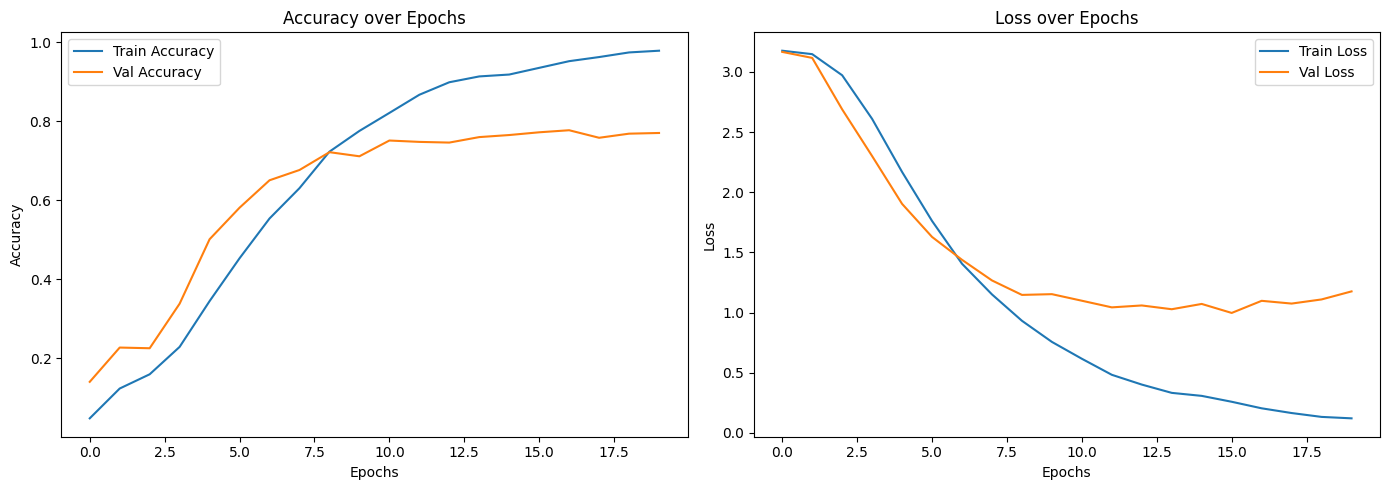

In [68]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(14, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [69]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(X_val_pad, y_val)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7627 - loss: 1.0433
Test Accuracy: 0.7726, Test Loss: 0.9966


In [77]:
# Predict and show classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict
y_pred_probs = model.predict(X_val_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
                        precision    recall  f1-score   support

            ACCOUNTANT       0.75      0.75      0.75        24
              ADVOCATE       0.47      0.71      0.57        24
           AGRICULTURE       1.00      0.88      0.93        24
               APPAREL       0.72      0.75      0.73        24
                  ARTS       0.87      0.54      0.67        24
            AUTOMOBILE       0.77      0.83      0.80        24
              AVIATION       1.00      0.75      0.86        24
               BANKING       0.70      0.79      0.75        24
                   BPO       1.00      1.00      1.00        24
  BUSINESS-DEVELOPMENT       0.55      0.50      0.52        24
                  CHEF       0.88      0.96      0.92        24
          CONSTRUCTION       0.71      0.83      0.77        24
            CONSULTANT       0.60      0.62      0.61        24
              DESIGNER       0.70      0.79      0.75        24

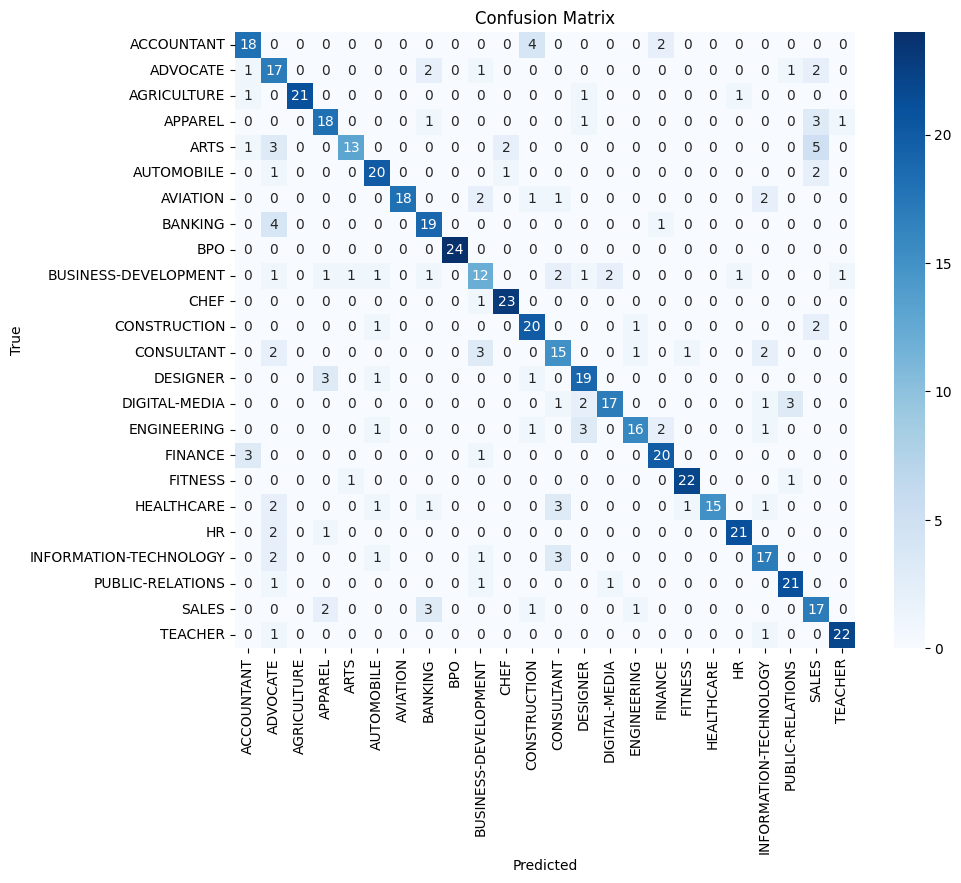

In [71]:
# Visualize Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


#### **Confusion Matrix Interpretation:**

- Each row represents the **actual job category**, and each column represents the **predicted job category** by the model.
- Values along the **diagonal** indicate **correct predictions**. Higher numbers here show good model performance.
- **Off-diagonal** values indicate **misclassifications**, where the model predicted the wrong category.

#### ✅ Examples:
- **ACCOUNTANT**:
  - Correctly predicted 22 times.
  - Misclassified once as **FINANCE** and once as **HR**.
- **CHEF**:
  - Perfectly predicted 24 times with **zero misclassifications**.
- **DIGITAL-MEDIA**:
  - Correctly classified 20 times.
  - Occasionally misclassified as **INFORMATION-TECHNOLOGY** or **FITNESS**.
- **FINANCE**:
  - Correctly predicted 18 times.
  - Misclassified 4 times as **ACCOUNTANT**, showing confusion in related fields.

#### 🔍 Insights:
- The model performs **very well overall**, especially on distinct categories.
- Misclassifications often happen between **similar job roles** (e.g., HR vs Consultant, Accountant vs Finance).
- This is expected and can be improved with more data or domain-specific features.



In [72]:
# Save model and tokenizer
import pickle
model.save('bilstm_resume_classifier.h5')
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

print("Model, tokenizer, and label encoder saved successfully.")

Model, tokenizer, and label encoder saved successfully.


### **5. Conclusion**

The project successfully developed a deep learning-based solution for automating the classification of resumes into job roles.  
Using a Bi-LSTM model enabled the system to learn complex patterns and contextual cues within resume text, resulting in high classification accuracy.  
This approach reduces the need for manual resume screening and speeds up the recruitment process, benefiting both employers and job seekers.  
The model is also scalable and can be adapted to different industries and resume formats with minimal modifications.


### **6.Future Scope**

Currently, the system classifies resumes into relevant job categories.  
In the future, it can be extended to match candidates with suitable companies based on detailed resume analysis, enabling more personalized and targeted recruitment.
